## Задачи на условный экстремум

Задача. Найдите минимальные и максимальные значения, которые принимает функция
$$
u= xy+x-y
$$
на окружности
$$
x^2+y^2=1.
$$

### Школьный  метод

Рассмотрим отдельно $y>0$ и $y<0$. В первом случае
$$
y=\sqrt{1-x^2}.
$$
1.) Постройте графи зависимости $u$ от $x$. В каких пределах меняется $x$? Имеются ли точки экстремума?

*х меняется от -1 до 1, имеются точки экстремума.*

In [2]:
var("x,y")
u=x*y+x-y
f=u.subs(y=sqrt(1-x^2))
f

sqrt(-x^2 + 1)*x + x - sqrt(-x^2 + 1)

Эта функция имеет экстремум

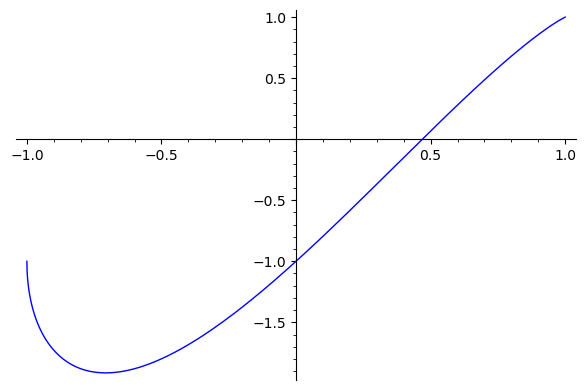

In [3]:
plot(f,(x,-1,1))

2.) Можно ли найти положения точек экстремума аналитически?

*можно, найдя производную от f(x) и приравняв ее к нулю.*

In [4]:
f1=diff(f,x).full_simplify()
f1

(sqrt(-x^2 + 1)*(2*x + 1) + x + 1)/(x + 1)

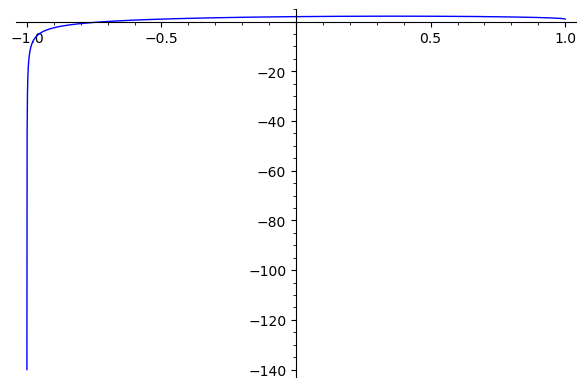

In [5]:
plot(f1,(x,-1,1))

Как решить это уравнение?

In [6]:
var("t")
S=[x==(t^2 - 1)/(t^2 + 1), y==-2*t/(t^2 + 1)]
u=x*y+x-y
f=u.subs(S).full_simplify()
f

(t^4 + 4*t - 1)/(t^4 + 2*t^2 + 1)

### Метод, основанный на параметризации

3.) Используя параметизации, постройте грайик $u$ от $t$. 

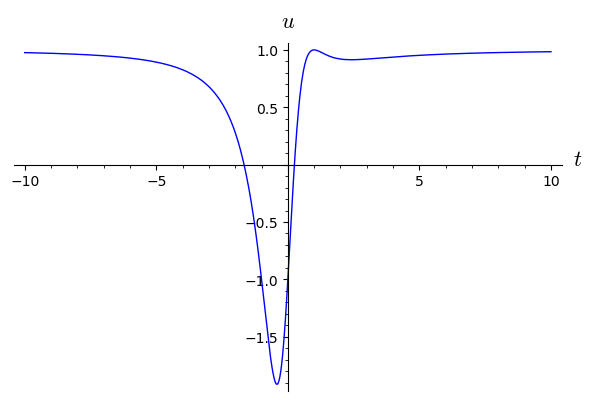

In [7]:
plot(f,(t,-10,10), axes_labels=['$t$','$u$'])

4.) Найдите положения стацинарных точек аналитически

In [8]:
f1=diff(f,t).full_simplify()
f1

4*(t^3 - 3*t^2 + t + 1)/(t^6 + 3*t^4 + 3*t^2 + 1)

In [9]:
R=QQ[t](f1.numerator()).roots(AA,False)
R

[-0.4142135623730951?, 1.000000000000000?, 2.414213562373095?]

In [10]:
[r.radical_expression() for r in R]

[-sqrt(2) + 1, 1, sqrt(2) + 1]

5.) Определите тип точки экстремума

In [11]:
[diff(f,t,2).subs(t=r) for r in R]

[9.94974746830584?, -1, 0.05025253169416733?]

Итог: $t=1\pm \sqrt{2}$ -- точки минимума, $t=1$ -- точка максимума.

6.) Найдите минимальное и максимальное значение функции $u$.

In [12]:
[f.subs(t=r.radical_expression()) for r in R]

[((sqrt(2) - 1)^4 - 4*sqrt(2) + 3)/((sqrt(2) - 1)^4 + 2*(sqrt(2) - 1)^2 + 1),
 1,
 ((sqrt(2) + 1)^4 + 4*sqrt(2) + 3)/((sqrt(2) + 1)^4 + 2*(sqrt(2) + 1)^2 + 1)]

Не забываем вычислить предел $u$ при $t\to \infty$: 
$$
u \to 1.
$$
Ответ: максимальное значение 1, минимальное равно:

In [13]:
f.subs(t=R[0].radical_expression())

((sqrt(2) - 1)^4 - 4*sqrt(2) + 3)/((sqrt(2) - 1)^4 + 2*(sqrt(2) - 1)^2 + 1)

In [14]:
RR(f.subs(t=R[0].radical_expression()))

-1.91421356237310

## Задачи на безусловный экстремум

Задача. Найдите точки локального экстремума функции
$$
u=x^2+y^2+x^3+x^2y^2+y^4
$$

7.) Постройте гарфик и линии уровня функции

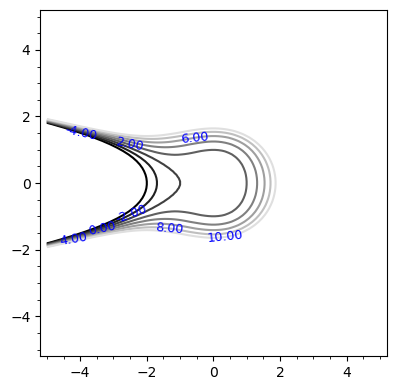

In [15]:
var("x,y")
u=x^2+y^2+x^3+x^2*y^2+y^4
contour_plot(u,(x,-5,5),(y,-5,5), fill=False, contours=[-4,-2,0,2,4,6,8,10], labels=True)

In [16]:
plot3d(u,(x,-1,1),(y,-1,1))

Graphics3d Object

Зам. Не зная критических точек, нельзя правильно выбрать масштаб. 

8.) Найдите стационарные точки, то есть точки, в которых обе производные равны нулю.

In [17]:
S=[diff(u,x), diff(u,y)]
S

[2*x*y^2 + 3*x^2 + 2*x, 2*x^2*y + 4*y^3 + 2*y]

In [18]:
K=PolynomialRing(QQ,[y,x],order='lex')
J=K*S
B=J.groebner_basis()
B

[y^3 + 1/2*y*x^2 + 1/2*y, y^2*x + 3/2*x^2 + x, y*x^3 - 3*y*x^2 - y*x, x^4 - 7/3*x^3 - 3*x^2 - 2/3*x]

In [19]:
len(B)

4

Зам. Здесь получился редцированный базис Грёбнера, состоящий не из 2, а из 3 уравнений.

In [20]:
X=QQ[x](B[-1]).roots(AA,False)
X

[-0.6666666666666667?, -0.3027756377319947?, 0, 3.302775637731995?]

In [23]:
[AA[y](B[1].subs(x=xx)) for xx in X]

[-2/3*y^2,
 -0.3027756377319947?*y^2 - 0.1652660075259706?,
 0,
 3.302775637731995?*y^2 + 19.66526600752597?]

При $x =0$ второе уравнение обращается в нуль тождественно. 

Случай 1. $x\not =0$

In [28]:
Y=[AA[y](B[0].subs(x=xx)).roots(AA,False)[0] for xx in X if xx!=0]
Y

[0, 0, 0]

In [29]:
XY=list(zip(X,Y))
XY

[(-2/3, 0), (-0.3027756377319947?, 0), (0, 0)]

Первое уравнение удовлетворяется тождественно:

In [30]:
[QQ[x,y](B[0])(xx,yy) for (xx,yy) in XY]

[0, 0, 0]

In [31]:
[QQ(QQ[x,y](B[0])(xx,yy)) for (xx,yy) in XY]

[0, 0, 0]

Случай 2. $x=0$

In [32]:
QQ[x,y](B[1]).subs(x=0)

0

In [33]:
h=QQ[x,y](B[0]).subs(x=0)
h

y^3 + 1/2*y

In [34]:
Y0=QQ[y](h).roots(AA,False)
Y0

[0]

In [35]:
XY=XY+list(zip([0,0],Y0))

In [36]:
XY

[(-2/3, 0), (-0.3027756377319947?, 0), (0, 0), (0, 0)]

9.) Проверьте выполнение достаточного условия: с.з. гессиана имеют один и тот же знак. 

In [37]:
[u.hessian().subs(x=xx).subs(y=yy) for (xx,yy) in XY]

[
[  -2    0]  [0.1833461736080321?                   0]  [2 0]  [2 0]
[   0 26/9], [                  0  2.183346173608032?], [0 2], [0 2]
]

In [38]:
[matrix(AA,u.hessian().subs(x=xx).subs(y=yy)).eigenvalues() for (xx,yy) in XY]

[[2.888888888888889?, -2.000000000000000?],
 [2.183346173608032?, 0.1833461736080321?],
 [2, 2],
 [2, 2]]

Зам. Здесь имеется баг, нужно сообщить Sage, что гессиан -- матрица над $\mathbb{A}$. 

10.) Охарактеризуйте все найденные стационарные точки (min/max/седло). 

### Первая точка 

In [49]:
XY[0] # - седло

(-2/3, 0)

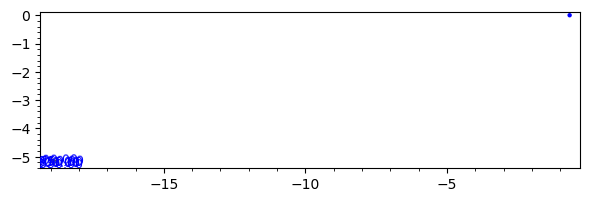

In [50]:
contour_plot(u,(x,-19,-18.7),(y,-5.3,-5.1), fill=False, labels=True)+ point(XY[0])+\
implicit_plot(u-QQ[x,y](u)(*XY[0]),(x,-19,-18.7),(y,-5.3,-5.1))

Зам. Чтобы увидеть седло, нужно нарисовать линию уровня, проходящую через стационарную точку. 

### Вторая точка

In [51]:
XY[1] # - седло

(-0.3027756377319947?, 0)

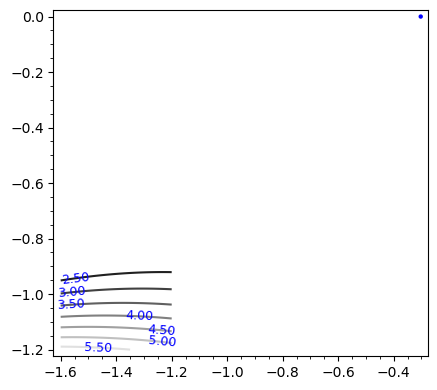

In [52]:
contour_plot(u,(x,-1.6,-1.2),(y,-1.2,-0.9), fill=False, labels=True)+ point(XY[1])

### Третья точка

In [53]:
XY[2] # - седло

(0, 0)

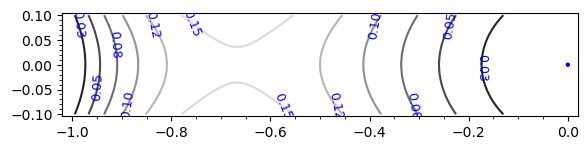

In [54]:
contour_plot(u,(x,-1,0),(y,-0.1,0.1), fill=False, labels=True)+ point(XY[2])+\
implicit_plot(u-QQ[x,y](u)(*XY[2]),(x,-1,0),(y,-0.1,0.1))

### Четвертая точка

In [46]:
XY[3] # - седло

(0, -0.7368062997280774?)

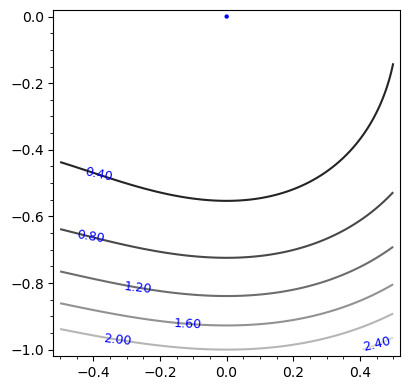

In [48]:
contour_plot(u,(x,-0.5,0.5),(y,-1,0), fill=False, labels=True)+ point(XY[3])

### Пятая точка

In [48]:
XY[4] # точки минимума

(0, 0)

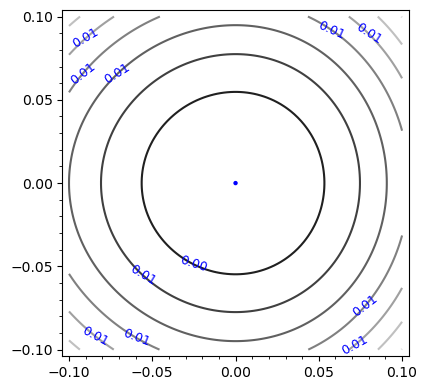

In [49]:
contour_plot(u,(x,-0.1,0.1),(y,-0.1,0.1), fill=False, labels=True)+ point(XY[4])